In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
data = pd.read_csv("project4.csv")

In [2]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
data.shape

(286, 10)

In [4]:
data.size

2860

In [5]:
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [7]:
def replace(s):
    x = s.split('-')
    x1 = int(x[0])
    x2 = int(x[1])
    return (x1+x2)/2 

In [8]:
data['age'] = data['age'].apply(replace).astype(float)
data['tumor-size'] = data['tumor-size'].apply(replace).astype(float)
data['inv-nodes'] = data['inv-nodes'].apply(replace).astype(float)

In [9]:
data[data['breast-quad'] == "?"] # just one row is missing data and there is no way to get the value so we will just remove it
data = data.drop([206])
data[data['breast-quad'] == "?"]
data.shape # one row was removed

(285, 10)

In [10]:
data[data['node-caps'] == "?"] # repeat for node-caps since there does not seem to be one thing that tells us if it should be yes or no

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,44.5,premeno,27.0,1.0,?,2,left,right_low,yes
163,no-recurrence-events,64.5,ge40,27.0,4.0,?,1,right,left_up,yes
164,no-recurrence-events,64.5,ge40,27.0,4.0,?,1,right,left_low,yes
183,no-recurrence-events,54.5,ge40,32.0,10.0,?,3,left,left_up,yes
184,no-recurrence-events,54.5,ge40,32.0,10.0,?,3,left,left_low,yes
233,recurrence-events,74.5,ge40,17.0,10.0,?,1,left,left_low,yes
263,recurrence-events,54.5,lt40,22.0,1.0,?,1,left,left_up,no
264,recurrence-events,54.5,lt40,22.0,1.0,?,1,left,left_low,no


In [11]:
data.drop(data[data['node-caps'] == "?"].index,inplace=True)

In [12]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.shape # eliminated 14 duplicates

(263, 10)

In [13]:
data['class'] = data['class'].astype('category')
data['menopause'] = data['menopause'].astype('category')
data['node-caps'] = data['node-caps'].astype('category')
data['breast'] = data['breast'].astype('category')
data['breast-quad'] = data['breast-quad'].astype('category')
data['irradiat'] = data['irradiat'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    float64 
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    float64 
 4   inv-nodes    263 non-null    float64 
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    int64   
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(6), float64(3), int64(1)
memory usage: 10.7 KB


In [14]:
data = pd.get_dummies(data, columns=["class", "menopause", "node-caps","breast","breast-quad","irradiat"], drop_first=True)
data.shape

(263, 14)

In [15]:
X = data.drop('class_recurrence-events', axis=1)
y = data['class_recurrence-events']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [16]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import xgboost as xgb

In [18]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}
# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0}
Best score:  0.821021021021021


In [19]:
from sklearn.metrics import classification_report

In [20]:
acc_xgb = grid_search.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, acc_xgb.predict(x_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, acc_xgb.predict(x_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.74      0.89      0.81        56
        True       0.45      0.22      0.29        23

    accuracy                           0.70        79
   macro avg       0.59      0.56      0.55        79
weighted avg       0.65      0.70      0.66        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.82      0.98      0.90       130
        True       0.93      0.48      0.63        54

    accuracy                           0.84       184
   macro avg       0.87      0.73      0.76       184
weighted avg       0.85      0.84      0.82       184



In [21]:

# Create the RandomizedSearchCV object
grid_recall = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall',n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
grid_recall.fit(x_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_recall.best_params_)
print("Best score: ", grid_recall.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.9}
Best score:  0.5018181818181818


In [22]:
recall_xgb = grid_recall.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, recall_xgb.predict(x_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, recall_xgb.predict(x_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.75      0.91      0.82        56
        True       0.55      0.26      0.35        23

    accuracy                           0.72        79
   macro avg       0.65      0.59      0.59        79
weighted avg       0.69      0.72      0.69        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       130
        True       0.97      0.67      0.79        54

    accuracy                           0.90       184
   macro avg       0.93      0.83      0.86       184
weighted avg       0.91      0.90      0.89       184



In [23]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': np.arange(3, 20, 1),
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [24]:
# Create the RandomizedSearchCV object
grid_recall2 = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall',n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
grid_recall2.fit(x_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_recall2.best_params_)
print("Best score: ", grid_recall2.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0}
Best score:  0.5018181818181818


In [25]:
recall_xgb2 = grid_recall2.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, recall_xgb2.predict(x_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, recall_xgb2.predict(x_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.74      0.89      0.81        56
        True       0.45      0.22      0.29        23

    accuracy                           0.70        79
   macro avg       0.59      0.56      0.55        79
weighted avg       0.65      0.70      0.66        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       130
        True       0.97      0.67      0.79        54

    accuracy                           0.90       184
   macro avg       0.93      0.83      0.86       184
weighted avg       0.91      0.90      0.89       184



In [32]:
import pickle
with open('acc_xgb', 'wb') as f:
    pickle.dump(acc_xgb, f)

In [33]:
with open('recall_xgb', 'wb') as f:
    pickle.dump(recall_xgb, f)

In [34]:
with open('recall_xgb2', 'wb') as f:
    pickle.dump(recall_xgb2, f)

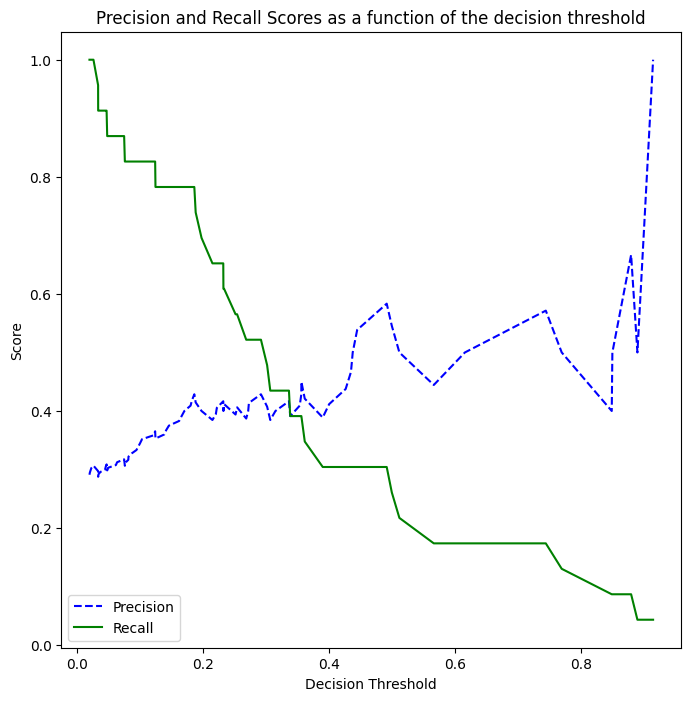

In [29]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# generate the probabilities on the test set; here we could use any model
Y_probs = recall_xgb.predict_proba(x_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

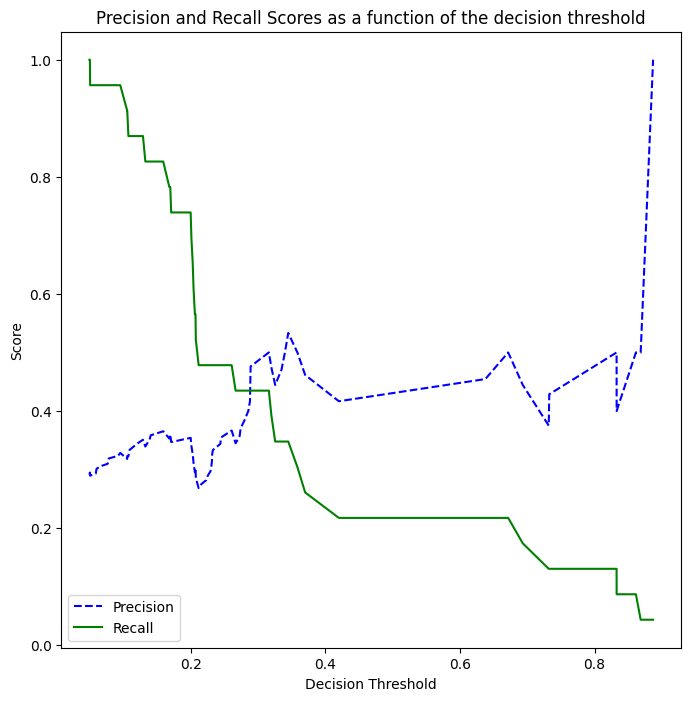

In [30]:
Y_probs = acc_xgb.predict_proba(x_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

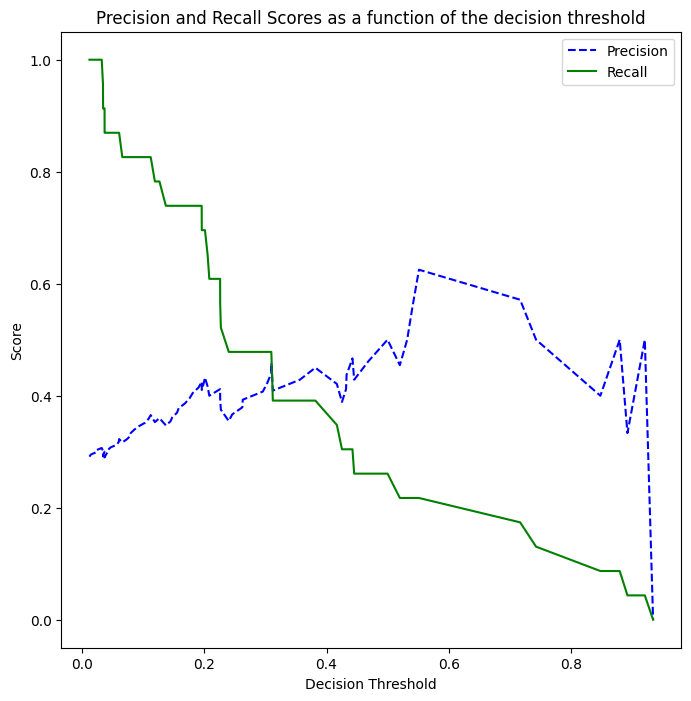

In [31]:
Y_probs = recall_xgb2.predict_proba(x_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)